In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import csv
import numpy as np

In [3]:
# Constants
MAX = 2e9
MIN = 1e-5
NUM_DEC = 5
FACTOR = 0.9
MIN_P = 0.55
MAX_P = 0.95
SMALL = 50
MEDIUM = 100
LARGE = 200

# same as number of TA's? TODO:fix this
SMALL_H = 50
MEDIUM_H = 100
LARGE_H = 200

# maximum number of TA's / homes
SMALL_TA = 25
MEDIUM_TA = 50
LARGE_TA = 100

In [4]:
# G = nx.Graph([(1,1), (2,2), (1,2), (1,2)])
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)
G.add_edge(2, 2)
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1]
 [1 1]]


In [8]:
G = nx.Graph()
# H = nx.path_graph(2)
# G.add_nodes_from(H)
G = nx.petersen_graph()
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
# plt.show()
# plt.subplot(121)

# nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)

# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

[0, 1, 2]
[(0, 1), (0, 2), (1, 2)]
{'weight': 4.7}
9


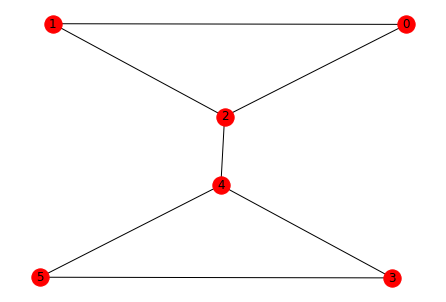

In [11]:
G1 = nx.complete_graph(3)
# plt.subplot(121)
# nx.draw(G1, node_color='blue', with_labels=True)
print(list(G1.nodes()))
print(list(G1.edges()))

G2 = nx.complete_graph(range(3,6))
# plt.subplot(122)
# nx.draw(G2, node_color='red', with_labels=True)

G3 = nx.union(G1, G2)
G3.add_edge(2, 4, weight=4.7)
print(G3[4][2])
nx.draw(G3, node_color='red', with_labels=True)
print(list(G.nodes()).pop())

In [113]:
def add_weights(g):
    w1 = rd.uniform(MIN, MAX)
    w2 = rd.uniform(MIN_P * w1, MAX_P * w1)
    w3 = rd.uniform(MIN_P * w1, MAX_P * w1)
    ws = [w1, w2, w3]
    for _, data in g.edges.items():
        data['weight'] = round(ws.pop(), NUM_DEC)
    
def connect(G, g):
    Gnodes = list(G.nodes)
    gnodes = list(g.nodes)
    G = nx.union(G, g)
    for n in gnodes:
        idx = rd.randrange(0, len(Gnodes))
        a = Gnodes.pop(idx)
        try:
            w = nx.shortest_path_length(G, source=a, target=n) * FACTOR
        except nx.NetworkXNoPath:
            ws = [i for _, _, i in g.edges.data('weight')]
            w = rd.uniform(min(ws), max(ws)) * FACTOR
        G.add_edge(a, n, weight=round(w, NUM_DEC))
    return G
        
def gen_graph(n):
    G = nx.Graph()
    while n:
        a = n.pop()
        b = n.pop()
        c = n.pop()
        nodes = [a, b, c]
        g = nx.complete_graph(nodes)
        add_weights(g)
        if len(G.nodes) == 0:
            G = g
        else:
            G = connect(G, g)
    return G

[[3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 12449

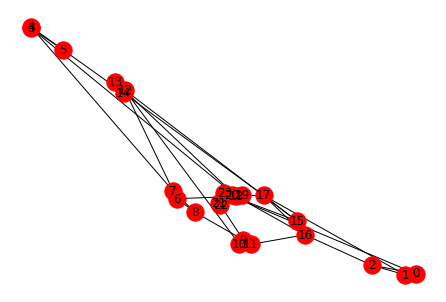

In [135]:
G = gen_graph(list(range(24)))
try:
    nx.shortest_path_length(G, source=2, target=3)
except nx.NetworkXNoPath:
    print("No path")
# for e in G.edges.items():
#     print(e)
nx.draw(G, node_color='red', with_labels=True)
A = nx.adjacency_matrix(G).toarray()
B = [[None] * len(A[0])] * len(A)
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j] == 0.0:
            B[i][j] = 'x'
        else:
            B[i][j] = A[i][j]
print(B)

In [136]:
def write_to_file(file, string, append=False):
    if append:
        mode = 'a'
    else:
        mode = 'w'
    with open(file, mode) as f:
        f.write(string)


def write_data_to_file(file, data, separator, append=False):
    if append:
        mode = 'a'
    else:
        mode = 'w'
    with open(file, mode) as f:
        for item in data:
            f.write(f'{item}{separator}')

In [145]:
f = open('world-cities.csv')
csv_f = csv.reader(f)
world_cities = []
for r in csv_f:
    name = r[0]
    if name.isalpha() and name != 'name':
        world_cities.append(name)
city_num = len(world_cities)
# print(world_cities)
small_list = []
medium_list = []
large_list = []
for i in range(SMALL):
    idx = rd.randrange(0, city_num)
    small_list.append(world_cities[idx])
for i in range(MEDIUM):
    idx = rd.randrange(0, city_num)
    medium_list.append(world_cities[idx])
for i in range(LARGE):
    idx = rd.randrange(0, city_num)
    large_list.append(world_cities[idx])

In [146]:
input_file = "7\n4\nSoda"
write_to_file("input.txt", input_file)

# Method 2: Complete Graph with Random Weights Adjusted

Generate a complete graph with random weights associated each edge. Use floyd_warshall to produce the 
all-pairs shortest path distances. For each edge, set the length of the edge to be the length of the shortest distance between those two vertices.

/home/radar/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


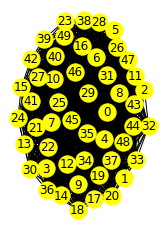

In [102]:
# Generate 
G_final = nx.complete_graph(SMALL)
plt.subplot(121)
nx.draw(G_final, node_color='yellow', with_labels=True)

# print(list(G1.nodes()))
# print(list(G1.edges()))

In [103]:
def print_edge_weights(g):
    for edge, data in g.edges.items():
        print(edge, data)  

In [104]:
def add_weights2(g, lower, upper):
    """Update the weight of each edge to be a random weight within the bounds."""
    for edge, data in g.edges.items():
        w = rd.uniform(lower, upper)
        data['weight'] = round(w, NUM_DEC)
#         print(edge, data)        

In [105]:
dict1 = nx.floyd_warshall(G_final, weight='weight')
# plt.subplot(121)
# nx.draw(G_final, node_color='yellow', with_labels=True)
# print(list(G_final.nodes()))
# print(list(G_final.edges().items()))
# dict1 = nx.all_pairs_shortest_path_length(G_final)

In [106]:
def print_shortest_pair_distance(g):
    rs = nx.floyd_warshall(g)
    for i in rs:
        for j in rs[i]:
            print ("%d\t%d\t%f" % (i, j, rs[i][j]))

In [107]:
def fix_triangle_inequalities(g):
    done = False
    while not done:
        done = True
        rs = nx.floyd_warshall(g, weight='weight')
        for edge, data in g.edges.items():
            if data['weight'] > rs[edge[0]][edge[1]]:
                print('change ' + str(edge) + " " + str(data['weight']) + " to " + str(rs[edge[0]][edge[1]]))
                data['weight'] = rs[edge[0]][edge[1]]
                done = False
                break

Generate random weight for each edge.

In [110]:
# G_final[2][3]['weight'] = 78.73409
add_weights2(G_final, MIN, MAX)
print_edge_weights(G_final)  

(0, 1) {'weight': 620140770.70897}
(0, 2) {'weight': 785089385.37604}
(0, 3) {'weight': 171980414.09289}
(0, 4) {'weight': 559962894.55737}
(0, 5) {'weight': 555816364.32722}
(0, 6) {'weight': 739432431.85412}
(0, 7) {'weight': 659075096.08833}
(0, 8) {'weight': 1609219732.50251}
(0, 9) {'weight': 1304700906.30421}
(0, 10) {'weight': 757817199.17211}
(0, 11) {'weight': 1603399858.39307}
(0, 12) {'weight': 1971391191.64053}
(0, 13) {'weight': 926609381.43249}
(0, 14) {'weight': 801884532.86587}
(0, 15) {'weight': 1895839240.14143}
(0, 16) {'weight': 46651318.73273}
(0, 17) {'weight': 1273643895.81066}
(0, 18) {'weight': 728567247.01132}
(0, 19) {'weight': 1050297.46912}
(0, 20) {'weight': 1822774700.74129}
(0, 21) {'weight': 1517350434.90373}
(0, 22) {'weight': 1020244218.17743}
(0, 23) {'weight': 968751571.8148}
(0, 24) {'weight': 1325216151.83319}
(0, 25) {'weight': 840612413.30014}
(0, 26) {'weight': 1765574539.1472}
(0, 27) {'weight': 106258455.88871}
(0, 28) {'weight': 1316534732.9

Fix the weight to satisfy the trangle inequalities.

In [111]:
fix_triangle_inequalities(G_final)
print_edge_weights(G_final)  

change (0, 1) 620140770.70897 to 243426693.40415
change (0, 2) 785089385.37604 to 152138954.23928
change (0, 3) 171980414.09289 to 166782593.13819
change (0, 4) 559962894.55737 to 171450024.25694
change (0, 5) 555816364.32722 to 112206400.64161
change (0, 6) 739432431.85412 to 171789223.58433
change (0, 7) 659075096.08833 to 145639304.73045
change (0, 8) 1609219732.50251 to 133748565.92661
change (0, 9) 1304700906.30421 to 306170950.98576
change (0, 10) 757817199.17211 to 269707661.58578
change (0, 11) 1603399858.39307 to 205257114.27163
change (0, 12) 1971391191.64053 to 232022155.87294
change (0, 13) 926609381.43249 to 202917924.53530002
change (0, 14) 801884532.86587 to 187459548.35162002
change (0, 15) 1895839240.14143 to 267434794.37437
change (0, 17) 1273643895.81066 to 256357450.07404
change (0, 18) 728567247.01132 to 144549757.01417
change (0, 20) 1822774700.74129 to 160033590.51049
change (0, 21) 1517350434.90373 to 143154928.04617
change (0, 22) 1020244218.17743 to 365543652.

change (3, 40) 1074385004.28337 to 161999904.10305
change (3, 41) 1868022809.31829 to 119046160.78912
change (3, 43) 1398416558.97172 to 88378603.36841
change (3, 44) 517833417.05547 to 161169235.62078
change (3, 45) 916758003.19234 to 119736965.59348
change (3, 46) 908174044.53835 to 105473754.48061
change (3, 47) 383336726.41144 to 122517246.39852
change (3, 48) 1893301582.44798 to 180188974.74194002
change (3, 49) 700538050.23376 to 77971930.95621
change (4, 5) 1698539305.60955 to 237278038.74721
change (4, 6) 1626901066.86604 to 152479938.51177
change (4, 7) 1531989844.10068 to 126330019.65788999
change (4, 6) 152479938.51177 to 152479938.51176998
change (2, 4) 198982352.65096 to 198982352.65095997
change (4, 8) 844382618.46279 to 193991407.51150998
change (4, 9) 492189650.16202 to 260439995.50877
change (4, 11) 1990326145.17089 to 33807090.01469
change (4, 12) 1809065327.31617 to 156520661.73032
change (4, 13) 1623865153.80776 to 138411230.61045
change (4, 14) 1436163308.21207 to 

change (7, 21) 1395182136.41539 to 77067749.97318
change (7, 22) 933061201.30356 to 357119719.52121997
change (7, 25) 1664782400.32902 to 149299901.61422
change (7, 26) 1610026788.35909 to 84918055.50127
change (6, 26) 111067974.35515001 to 111067974.35515
change (7, 27) 762591770.42798 to 100372742.35931998
change (7, 28) 490047476.98323 to 198950265.9826
change (7, 29) 818898354.05761 to 255351012.95964998
change (7, 30) 430914821.82925 to 166336222.67176
change (7, 31) 877206974.94015 to 85157856.30985
change (7, 32) 179111071.39394 to 106457008.77701999
change (4, 8) 193991407.51150998 to 193991407.51150995
change (4, 21) 203397769.63107 to 203397769.63106996
change (4, 26) 211248075.15916 to 211248075.15915996
change (4, 48) 228184743.4089 to 228184743.40889996
change (7, 33) 1259973411.60431 to 70859712.1601
change (7, 34) 754124299.55132 to 110401334.82266
change (7, 36) 423055882.72037 to 68837890.42541
change (7, 38) 541154753.00873 to 111933661.20042
change (7, 39) 1931236838

change (11, 45) 552829742.90337 to 97530889.39729
change (11, 46) 1824733600.20004 to 138349835.14069998
change (11, 47) 355220587.98011 to 180419015.15767
change (11, 48) 1947727170.59061 to 222245811.66184998
change (11, 49) 1995254350.62593 to 120753407.94556
change (12, 13) 1580449601.67332 to 196763126.13270003
change (12, 14) 666815654.567 to 127832731.406
change (12, 13) 196763126.13270003 to 196763126.1327
change (12, 16) 928973748.9508 to 268640961.02489
change (12, 17) 352311846.87885 to 275224096.23031
change (12, 18) 501957328.57595 to 147093207.18726
change (12, 19) 248531169.96512 to 230971858.40382
change (12, 20) 352567625.5993 to 301731874.39633995
change (12, 21) 441598866.59172 to 168784182.36297
change (12, 22) 1102976982.20747 to 448836151.91100997
change (12, 23) 566838801.90061 to 166473683.77972
change (12, 24) 270909331.68149 to 181689108.13544
change (12, 25) 604271802.541 to 241016334.00401
change (12, 26) 228207083.68758 to 176634487.89106
change (12, 27) 14

change (16, 41) 551310262.85035 to 150854073.59555
change (16, 42) 178729458.5379 to 114045273.94887
change (16, 43) 1194891978.12077 to 187693521.08201998
change (16, 44) 706608109.8973 to 143010681.45685
change (16, 45) 1065653591.71743 to 193189425.34618
change (16, 46) 1104321431.45349 to 204788672.19421998
change (16, 47) 554681070.57677 to 90916665.47240001
change (16, 48) 511873835.12893 to 265151213.06946
change (16, 49) 1336640510.79172 to 191928303.42846
change (17, 18) 1422614560.74361 to 205214334.62976998
change (17, 19) 1381354133.01917 to 255307152.60491997
change (0, 17) 256357450.07404 to 256357450.07403997
change (17, 20) 1012430515.7441 to 236483852.39793
change (17, 21) 1059592911.11124 to 261300053.88314
change (17, 23) 745772810.64395 to 252885878.01872998
change (17, 24) 1030069782.20451 to 187941809.05286
change (17, 25) 1643678908.68234 to 193052283.44664
change (17, 26) 1300180056.21315 to 269150359.41122997
change (17, 27) 1633120550.58336 to 284605046.269279

change (22, 28) 688105781.76632 to 418854614.09817
change (22, 29) 1628286606.17984 to 475332854.83465993
change (22, 30) 1759221101.79731 to 429667757.70019996
change (22, 31) 975149197.69746 to 329893665.10374
change (22, 32) 1802642678.60577 to 447885265.95395994
change (22, 33) 928936272.41292 to 381705218.69106996
change (22, 35) 1907702017.87983 to 446120976.61368996
change (22, 36) 1427275792.34076 to 392725681.7212
change (22, 37) 1992986908.07131 to 392776925.06815
change (22, 38) 608326555.05483 to 269922524.54814
change (22, 39) 1497028465.84949 to 444609948.2260699
change (22, 40) 775780706.66985 to 441510012.70277995
change (22, 41) 492232688.83857 to 365324341.16341996
change (22, 42) 1864941899.03991 to 432937608.06216
change (22, 43) 1326025647.45099 to 367888711.96813995
change (22, 44) 1174597469.0398 to 461903015.57014
change (22, 45) 925592096.31234 to 461402751.61284995
change (22, 46) 1503783194.13029 to 384983863.08033997
change (22, 47) 461896728.4076 to 3789415

change (29, 41) 1574787914.4131 to 230634879.34304
change (29, 42) 1776843655.37233 to 204573076.55326998
change (29, 43) 1204417292.89559 to 266120005.40657
change (29, 45) 1340110846.95201 to 307778677.44603
change (29, 46) 1312224257.75856 to 283215156.51877
change (29, 47) 431949193.8453 to 276568429.39995
change (29, 48) 866559813.3927 to 357205736.71066
change (29, 49) 584849848.24349 to 255713332.99436998
change (30, 31) 1788087383.3295 to 217546607.09335
change (30, 32) 1729029003.87559 to 79729974.61846
change (30, 33) 1299897166.80724 to 237195934.83185998
change (30, 34) 717783249.4966 to 121283419.99071
change (30, 35) 642567383.36912 to 81494263.95873
change (30, 36) 1018263893.16003 to 234449473.02773
change (30, 37) 669381314.46436 to 201993428.21868998
change (30, 38) 1202712883.46588 to 277545243.80274
change (30, 39) 1052527865.82206 to 197614370.18607
change (30, 40) 1327010424.97777 to 212594421.53559
change (30, 41) 1950635286.69877 to 207048132.46995
change (30, 4

change (43, 48) 755633908.07387 to 112623716.19793001
change (44, 45) 710231568.00983 to 185583928.30148998
change (44, 46) 495041926.10472 to 142920369.06685
change (44, 47) 1236469949.84604 to 138524114.52554998
change (44, 48) 1557093074.42813 to 259009840.41910002
change (45, 46) 382599279.80886 to 172075066.99653998
change (45, 47) 1079770290.36649 to 190803453.35311997
change (45, 48) 422311880.28288 to 299925940.33542
change (45, 49) 272696114.40964 to 197708896.54968998
change (46, 47) 893679269.44988 to 143415169.63340998
change (46, 48) 1362612602.88036 to 129718867.31013
change (46, 49) 1056172849.36703 to 27501823.5244
change (47, 49) 822918966.29227 to 115913346.10901
change (48, 49) 314197635.2288 to 102217043.78573
(0, 1) {'weight': 243426693.40415}
(0, 2) {'weight': 152138954.23928}
(0, 3) {'weight': 166782593.13818997}
(0, 4) {'weight': 171450024.25693998}
(0, 5) {'weight': 112206400.64161}
(0, 6) {'weight': 171789223.58433}
(0, 7) {'weight': 145639304.73045}
(0, 8) {'